In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

In [2]:
# Initialize variables

Ixx, Ixy, Ixz = 0.0635, -2.7E-20, -2.4E-18
Iyx, Iyy, Iyz = -2.7E-20, 0.0635, -1.8E-20
Izx, Izy, Izz = -2.4E-18, -1.8E-20, 0.0102

alpha_x, alpha_y, alpha_z = 2E-4, 2E-4, 1E-3

def theta(alpha, t):
    return (math.pi / 6 * t) + (0.5 * - alpha * t**2)

def a(Kxx, Kxz, alpha, t):
  return Kxx * np.sin(theta(alpha, t)) - Kxz * np.cos(theta(alpha, t))

def b(Kyx, Kyz, alpha, t):
  return Kyx * np.sin(theta(alpha, t)) - Kyz * np.cos(theta(alpha, t))

def c(Kzx, Kzz, alpha, t):
  return Kzx * np.sin(theta(alpha, t)) - Kzz * np.cos(theta(alpha, t))

def d(Kxx, Kxy, alpha, t):
  return Kxx * np.sin(theta(alpha, t)) - Kxy * np.cos(theta(alpha, t))

def e(Kyx, Kyy, alpha, t):
  return Kyx * np.sin(theta(alpha, t)) - Kyy * np.cos(theta(alpha, t))

def f(Kzx, Kzy, alpha, t):
  return Kzx * np.sin(theta(alpha, t)) - Kzy * np.cos(theta(alpha, t))

def g(Kxy, Kxz, alpha, t):
  return Kxy * np.sin(theta(alpha, t)) - Kxz * np.cos(theta(alpha, t))

def h(Kyy, Kyz, alpha, t):
  return Kyy * np.sin(theta(alpha, t)) - Kyz * np.cos(theta(alpha, t))

def i(Kzy, Kzz, alpha, t):
  return Kzy * np.sin(theta(alpha, t)) - Kzz * np.cos(theta(alpha, t))

def j(Kxy, Kxx, alpha, t):
  return Kxy * np.sin(theta(alpha, t)) - Kxx * np.cos(theta(alpha, t))

def k(Kyy, Kyx, alpha, t):
  return Kyy * np.sin(theta(alpha, t)) - Kyx * np.cos(theta(alpha, t))

def l(Kzy, Kzx, alpha, t):
  return Kzy * np.sin(theta(alpha, t)) - Kzx * np.cos(theta(alpha, t))

def m(Kxz, Kxy, alpha, t):
  return Kxz * np.sin(theta(alpha, t)) - Kxy * np.cos(theta(alpha, t))

def n(Kyz, Kyy, alpha, t):
  return Kyz * np.sin(theta(alpha, t)) - Kyy * np.cos(theta(alpha, t))

def o(Kzz, Kzy, alpha, t):
  return Kzz * np.sin(theta(alpha, t)) - Kzy * np.cos(theta(alpha, t))

def p(Kxz, Kxx, alpha, t):
  return Kxz * np.sin(theta(alpha, t)) - Kxx * np.cos(theta(alpha, t))

def q(Kyz, Kyx, alpha, t):
  return Kyz * np.sin(theta(alpha, t)) - Kyx * np.cos(theta(alpha, t))

def r(Kzz, Kzx, alpha, t):
  return Kzz * np.sin(theta(alpha, t)) - Kzx * np.cos(theta(alpha, t))

In [3]:
# Fitting models and sets

def model1(t, Kyz, Kyx):
  return (q(Kyz, Kyx, alpha_y, t) - b(Kyx, Kyz, alpha_y, t)) * np.cos(theta(alpha_y, t)) + \
      (b(Kyx, Kyz, alpha_y, t) - q(Kyz, Kyx, alpha_y, t)) * np.sin(theta(alpha_y, t))

def model2(t, Kzx, Kzz, Kxz, Kxx):
  return (c(Kzx, Kzz, alpha_y, t) - p(Kxz, Kxx, alpha_y, t)) * np.cos(theta(alpha_y, t)) + \
      (r(Kzz, Kzx, alpha_y, t) - a(Kxx, Kxz, alpha_y, t)) * np.sin(theta(alpha_y, t))

def model3(t, Kxy, Kxz):
  return (g(Kxy, Kxz, alpha_x, t) - m(Kxz, Kxy, alpha_x, t)) * np.cos(theta(alpha_x, t)) + \
      (m(Kxz, Kxy, alpha_x, t) - g(Kxy, Kxz, alpha_x, t)) * np.sin(theta(alpha_x, t))

def model4(t, Kyz, Kyy, Kzy, Kzz):
  return (n(Kyz, Kyy, alpha_x, t) - i(Kzy, Kzz, alpha_x, t)) * np.cos(theta(alpha_x, t)) + \
      (o(Kzz, Kzy, alpha_x, t) - h(Kyy, Kyz, alpha_x, t)) * np.sin(theta(alpha_x, t))

def model5(t, Kzx, Kzy):
  return (f(Kzx, Kzy, alpha_z, t) - l(Kzy, Kzx, alpha_z, t)) * np.cos(theta(alpha_z, t)) + \
      (l(Kzy, Kzx, alpha_z, t) - f(Kzx, Kzy, alpha_z, t)) * np.sin(theta(alpha_z, t))

def model6(t, Kxy, Kxx, Kyx, Kyy):
  return (j(Kxy, Kxx, alpha_z, t) - e(Kyx, Kyy, alpha_z, t)) * np.cos(theta(alpha_z, t)) + \
      (d(Kxx, Kxy, alpha_z, t) - k(Kyy, Kyx, alpha_z, t)) * np.sin(theta(alpha_z, t))

set1 = 2 * alpha_y * (Ixy + Izy)
set2 = -2 * alpha_y * Iyy
set3 = 2 * alpha_x * (Iyx + Izx)
set4 = -2 * alpha_x * Ixx
set5 = 2 * alpha_z * (Iyz + Ixz)
set6 = -2 * alpha_z * Izz

t_array =  [i for i in range(3601)]
set1_array, set2_array, set3_array, set4_array, set5_array, set6_array = [set1 for _ in range(3601)], [set2 for _ in range(3601)], [set3 for _ in range(3601)], [set4 for _ in range(3601)], [set5 for _ in range(3601)], [set6 for _ in range(3601)]

First K: 1.0100000000000007e-07 +- 4.688353790565439e-15
Second K: 1.009999999999999e-07 +- 4.688353790046401e-15


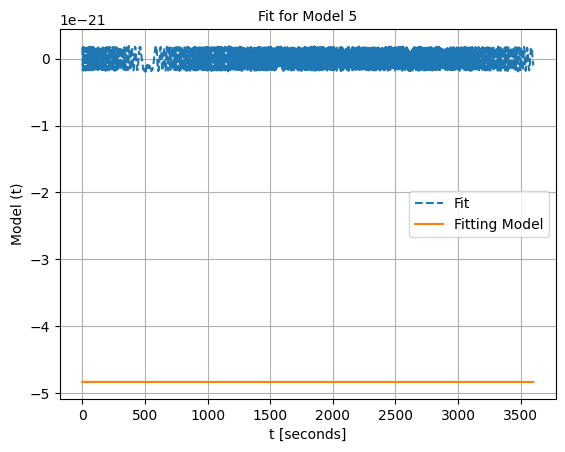

In [12]:
# Fitting (2 param case)

xdata, ydata = np.array(t_array), np.array(set5_array)           # specify model

initialguess = [1E-9,1E-9]

popt, pcov = curve_fit(model5, xdata, ydata, initialguess)          # specify model

print("First K:",popt[0],"+-",np.sqrt(pcov[0][0]))
print("Second K:",popt[1],"+-",np.sqrt(pcov[1][1]))

func_plot=[model5(x, popt[0], popt[1]) for x in xdata]

plt.clf()
plt.plot(xdata, func_plot, label='Fit', linestyle='--')
plt.plot(xdata, ydata, label='Fitting Model')
plt.title('Fit for Model 5', fontsize = 10)
plt.xlabel('t [seconds]', fontsize = 10)
plt.ylabel('Model (t)', fontsize = 10)
plt.grid(True)
plt.legend(loc='best')
plt.savefig('./Figures/Model 5 Fit.pdf',dpi=100,bbox_inches='tight')
plt.show()

First K: 208535706.58227575 +- 67.2210177267687
Second K: 208535706.5822763 +- 67.22101772132933


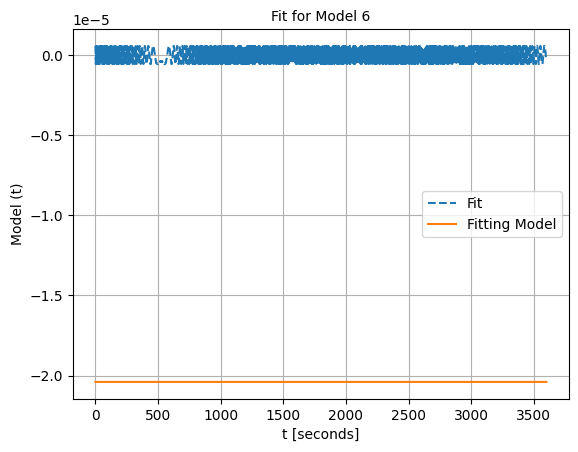

In [16]:
# Fitting (4 param case)

def model2(t, Kzz, Kxx):
  return (c(1.01E-7, Kzz, alpha_y, t) - p(2.53E-8, Kxx, alpha_y, t)) * np.cos(theta(alpha_y, t)) + \
      (r(Kzz, 1.01E-7, alpha_y, t) - a(Kxx, 2.53E-8, alpha_y, t)) * np.sin(theta(alpha_y, t))

def model4(t, Kyy, Kzz):
  return (n(1e-8, Kyy, alpha_x, t) - i(1e-7, Kzz, alpha_x, t)) * np.cos(theta(alpha_x, t)) + \
      (o(Kzz, 1e-7, alpha_x, t) - h(Kyy, 1e-8, alpha_x, t)) * np.sin(theta(alpha_x, t))

def model6(t, Kxx, Kyy):
  return (j(2.5e-8, Kxx, alpha_z, t) - e(1e-8, Kyy, alpha_z, t)) * np.cos(theta(alpha_z, t)) + \
      (d(Kxx, 2.5e-8, alpha_z, t) - k(Kyy, 1e-8, alpha_z, t)) * np.sin(theta(alpha_z, t))

xdata, ydata = np.array(t_array), np.array(set6_array)           # specify model

initialguess = [1E8, 1E8]

popt, pcov = curve_fit(model6, xdata, ydata, initialguess)          # specify model

print("First K:",popt[0],"+-",np.sqrt(pcov[0][0]))
print("Second K:",popt[1],"+-",np.sqrt(pcov[1][1]))
#print("Third K:",popt[2],"+-",np.sqrt(pcov[2][2]))
#print("Fourth K:",popt[3],"+-",np.sqrt(pcov[3][3]))

func_plot=[model6(x, popt[0], popt[1]) for x in xdata]   # specify model

plt.clf()
plt.plot(xdata, func_plot, label='Fit', linestyle='--')
plt.plot(xdata, ydata, label='Fitting Model')
plt.title('Fit for Model 6', fontsize = 10)
plt.xlabel('t [seconds]', fontsize = 10)
plt.ylabel('Model (t)', fontsize = 10)
plt.grid(True)
plt.legend(loc='best')
plt.savefig('./Figures/Model 6 Fit.pdf',dpi=100,bbox_inches='tight')
plt.show()